In [1]:
!ls

 ground_truth_eda.ipynb		    resolution_results3b-Copy1.ipynb
 pykitti_Jim_Bob.ipynb		    resolution_results3b-Copy2.ipynb
 README.md			    resolution_results3b.ipynb
 resolution_analysis3-Copy1.ipynb  'Screenshot from 2020-06-30 17-40-15.png'
 resolution_analysis3.ipynb	    venv


In [2]:
import os

import pandas as pd

In [3]:
path = '/home/robert/PycharmProjects/data/2018-09-18/viewer_logs/gt_records/gt_record_2018-09-18_0002.csv'
df = pd.read_csv(path)
df = df.loc[df.is_valid]
df.head()


,det_frame,lidar_frame,association_index,is_valid,is_manual,video_detection_index,lidar_detection_index,detection_class,detection_confidence,lidar_segment,lidar_distance,x1,y1,x2,y2
8,2540,2538,0,True,False,0,2,car,0.999839,15,35.527548,865,389,1127,516
9,2541,2539,0,True,False,0,0,car,0.999762,14,37.354999,853,391,1131,517
13,2545,2543,0,True,False,0,2,car,0.999446,14,42.055086,825,381,1057,498
14,2546,2544,0,True,False,0,2,car,0.999818,13,41.827156,827,379,1034,494
15,2547,2545,0,True,False,0,2,car,0.999810,13,43.166655,830,379,1025,488


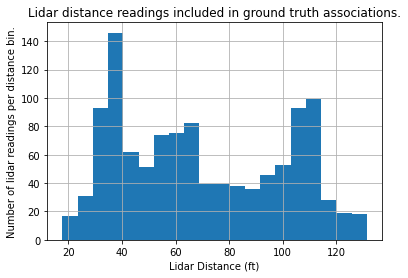

In [4]:
ax = df.lidar_distance.hist(bins=20)
ax.set_title('Lidar distance readings included in ground truth associations.')
ax.set_xlabel('Lidar Distance (ft)')
_ = ax.set_ylabel('Number of lidar readings per distance bin.')

In [5]:
df.columns

Index(['det_frame', 'lidar_frame', 'association_index', 'is_valid',
       'is_manual', 'video_detection_index', 'lidar_detection_index',
       'detection_class', 'detection_confidence', 'lidar_segment',
       'lidar_distance', 'x1', 'y1', 'x2', 'y2'],
      dtype='object')

In [6]:
cols = ['det_frame', 'detection_confidence', 'lidar_segment',
       'lidar_distance', 'x1', 'y1', 'x2', 'y2']

df[cols].describe()

,det_frame,detection_confidence,lidar_segment,lidar_distance,x1,y1,x2,y2
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,3707.228270,0.992146,8.292362,69.826776,601.068481,358.858648,754.531168,454.379280
std,536.255353,0.016659,4.421711,30.309010,231.348603,9.695461,260.429832,45.490185
min,2540.000000,0.860681,0.000000,17.837465,30.000000,326.000000,273.000000,385.000000
25%,3177.500000,0.993516,3.000000,40.354517,368.000000,353.000000,471.000000,415.000000
50%,3928.000000,0.998526,9.000000,64.341079,697.000000,358.000000,776.000000,443.000000
75%,4111.500000,0.999539,12.000000,100.178534,779.000000,365.000000,934.000000,487.500000
max,4475.000000,0.999984,15.000000,131.308943,1065.000000,393.000000,1280.000000,635.000000


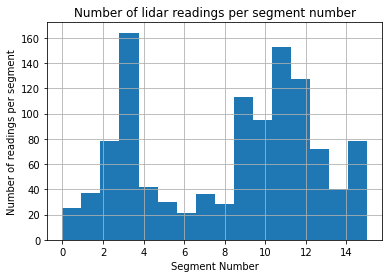

In [7]:
ax = df.lidar_segment.hist(bins=16)
ax.set_title('Number of lidar readings per segment number')
ax.set_xlabel('Segment Number')
_ = ax.set_ylabel('Number of readings per segment')

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

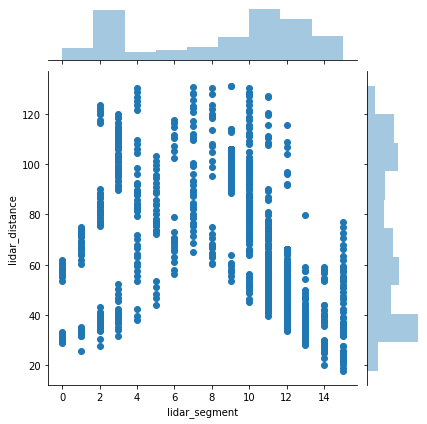

In [9]:
g = sns.jointplot("lidar_segment", "lidar_distance", data=df)